/tmp/ipykernel_684/479434787.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y_pred'] = model.predict(train_data[['year']])
/tmp/ipykernel_684/479434787.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = model.predict(test_data[['year']])
/home/vietman2/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
No artists with labels found to put in lege

Predicted temperature in 2033 is 13.39317058210164


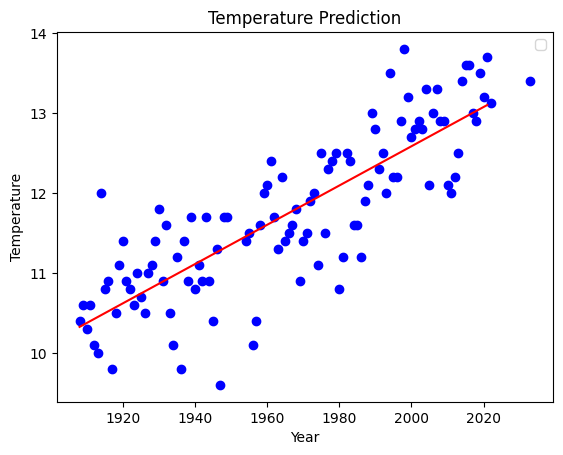

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
data = pd.read_csv("ta_20230322171713.csv")

# Preprocess the data
data.rename(columns={'년': 'year', '지점': 'location', '평균기온': 'y', '평균최저기온': 'y_1', '평균최고기온': 'y_2'}, inplace=True)
data = data.drop(['location', 'y_1', 'y_2'], axis=1)

train_data = data[data['year'] < 2022]
test_data = data[data['year'] >= 2022]

model = LinearRegression()
model.fit(train_data[['year']], train_data['y'])

# Predict the test data
train_data['y_pred'] = model.predict(train_data[['year']])
test_data['y_pred'] = model.predict(test_data[['year']])

year = 2033
pred = model.predict([[year]])

print("Predicted temperature in", year, "is", pred[0])

# Plot the data
fig, ax = plt.subplots()
ax.legend()
ax.plot(train_data['year'], train_data['y_pred'], color='red')
ax.scatter(train_data['year'], train_data['y'], color='blue')
ax.scatter(test_data['year'], test_data['y_pred'], color='blue')
ax.scatter(2033, pred, color='blue')
ax.legend()

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Prediction')
plt.show()
